# FISH image processing pipeline

## 1. Cellpose Segmentation

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.getcwd()))

In [2]:
from src.segmentation import CellposeSegmenter

In [3]:
# Initialize the CellposeSegmenter
segmenter = CellposeSegmenter(
    gpu=True,  # Set to False if you don't have GPU
    model_type='nuclei',
    diam_mean=19.0
)

Initializing denoise model...
Denoise model initialized
Initializing cellpose model...
Cellpose model initialized


In [4]:
# Check files in your folders
# Make sure to use relative paths from where your notebook is
results = segmenter.check_files_in_folder(
    input_folder="data/input",
    output_folder="data/output"
)

Checking input folder: data/input
Contents of input folder data/input:
- cropped_polygon_x3000_y12000_width800.tif
- cropped_polygon_x7247_y14117_width800.tif


In [ ]:
# It takes a while to process all the images
segmenter.process_images_in_folder("data/input", "data/output")

## 2. Get the reference line for stitching

In [1]:
from src.reference_line_analysis import *

In [2]:
# Input vertices from FIJI
# dataformat is (x, y, z)

vertices_3d = [
    (0.00, 0.00, 0.00),      # tile1
    (913.27, 5.24, 0.00),    # tile2
    (902.49, 920.44, 1.66),  # tile3
    (-16.66, 917.27, 2.32),  # tile4
    (-29.58, 1837.83, 3.75), # tile5
    (883.43, 1845.85, 5.24)  # tile6
]

In [3]:
# Package-level configurations
tile_zise = 1024
overlap_percentage = 10

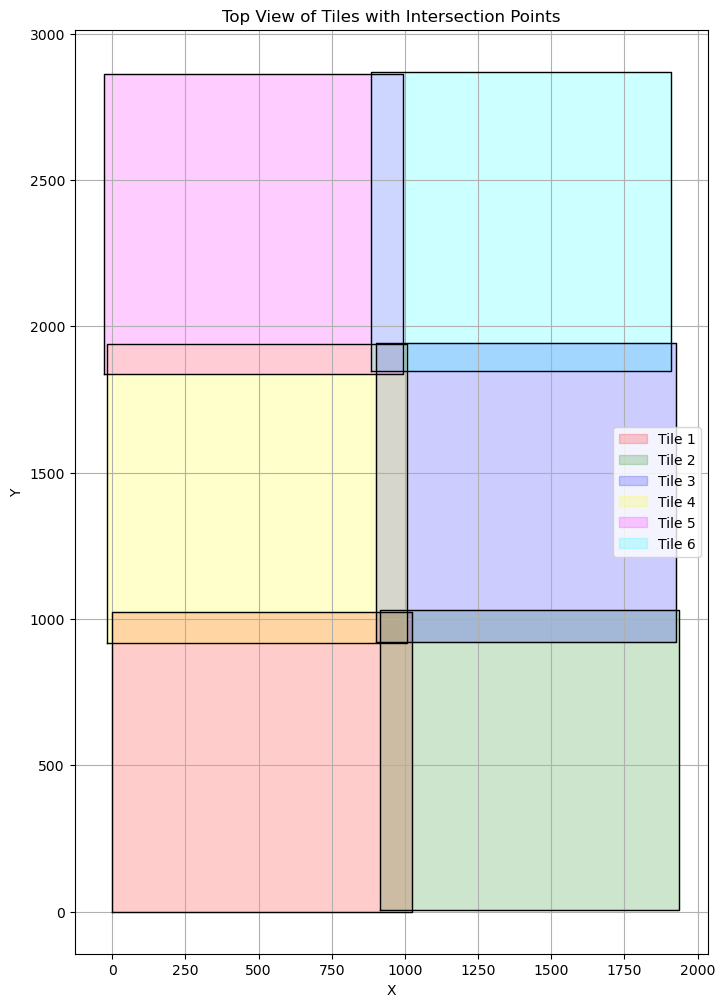

In [4]:
# Convert to 2D
vertices_2d = VertexConverter.convert_3d_to_2d(vertices_3d)
TilePlotter.plot_top_view(vertices_2d)

In [5]:
analyzer = TileAnalyzer(tile_size=1024)
x_coords, y_coords, intersections = analyzer.get_all_xy_coordinates(vertices_2d)
intersections

[{'x': 1024.0, 'y': 5.24, 'tiles': (1, 2)},
 {'x': 913.27, 'y': 1024.0, 'tiles': (1, 2)},
 {'x': 1024.0, 'y': 920.44, 'tiles': (1, 3)},
 {'x': 902.49, 'y': 1024.0, 'tiles': (1, 3)},
 {'x': 1007.34, 'y': 1024.0, 'tiles': (1, 4)},
 {'x': 0.0, 'y': 917.27, 'tiles': (1, 4)},
 {'x': 1926.49, 'y': 1029.24, 'tiles': (2, 3)},
 {'x': 913.27, 'y': 920.44, 'tiles': (2, 3)},
 {'x': 1007.34, 'y': 1029.24, 'tiles': (2, 4)},
 {'x': 913.27, 'y': 917.27, 'tiles': (2, 4)},
 {'x': 1007.34, 'y': 920.44, 'tiles': (3, 4)},
 {'x': 902.49, 'y': 1941.27, 'tiles': (3, 4)},
 {'x': 994.42, 'y': 1944.44, 'tiles': (3, 5)},
 {'x': 902.49, 'y': 1837.83, 'tiles': (3, 5)},
 {'x': 1907.4299999999998, 'y': 1944.44, 'tiles': (3, 6)},
 {'x': 902.49, 'y': 1845.85, 'tiles': (3, 6)},
 {'x': 994.42, 'y': 1941.27, 'tiles': (4, 5)},
 {'x': -16.66, 'y': 1837.83, 'tiles': (4, 5)},
 {'x': 1007.34, 'y': 1845.85, 'tiles': (4, 6)},
 {'x': 883.43, 'y': 1941.27, 'tiles': (4, 6)},
 {'x': 994.42, 'y': 1845.85, 'tiles': (5, 6)},
 {'x': 883

In [6]:
target_point = calculate_target_point(tile_zise, overlap_percentage)
target_point

(972.8, 972.8, 1945.6)

In [7]:
find_AB_points(vertices_2d, target_point)

{'x': {'point_A': 913.27, 'point_B': 994.42, 'middle_point': 953.845},
 'y1': {'point_A': 920.44, 'point_B': 1024.0, 'middle_point': 972.22},
 'y2': {'point_A': 1944.44, 'point_B': 2861.83, 'middle_point': 2403.135}}